<a href="https://colab.research.google.com/github/chloepalin/chloepalin.github.io/blob/master/98higher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#!ls gdrive/MyDrive
!unzip gdrive/My\ Drive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/REAL/4500 (10).jpg  
  inflating: train/REAL/4500 (2).jpg  
  inflating: train/REAL/4500 (3).jpg  
  inflating: train/REAL/4500 (4).jpg  
  inflating: train/REAL/4500 (5).jpg  
  inflating: train/REAL/4500 (6).jpg  
  inflating: train/REAL/4500 (7).jpg  
  inflating: train/REAL/4500 (8).jpg  
  inflating: train/REAL/4500 (9).jpg  
  inflating: train/REAL/4500.jpg     
  inflating: train/REAL/4501 (10).jpg  
  inflating: train/REAL/4501 (2).jpg  
  inflating: train/REAL/4501 (3).jpg  
  inflating: train/REAL/4501 (4).jpg  
  inflating: train/REAL/4501 (5).jpg  
  inflating: train/REAL/4501 (6).jpg  
  inflating: train/REAL/4501 (7).jpg  
  inflating: train/REAL/4501 (8).jpg  
  inflating: train/REAL/4501 (9).jpg  
  inflating: train/REAL/4501.jpg     
  inflating: train/REAL/4502 (10).jpg  
  inflating: train/REAL/4502 (2).jpg  
  inflating: train/REAL/4502 (3).jpg  
  inflating: train/REAL/4502 (4).jpg  
  inflating:

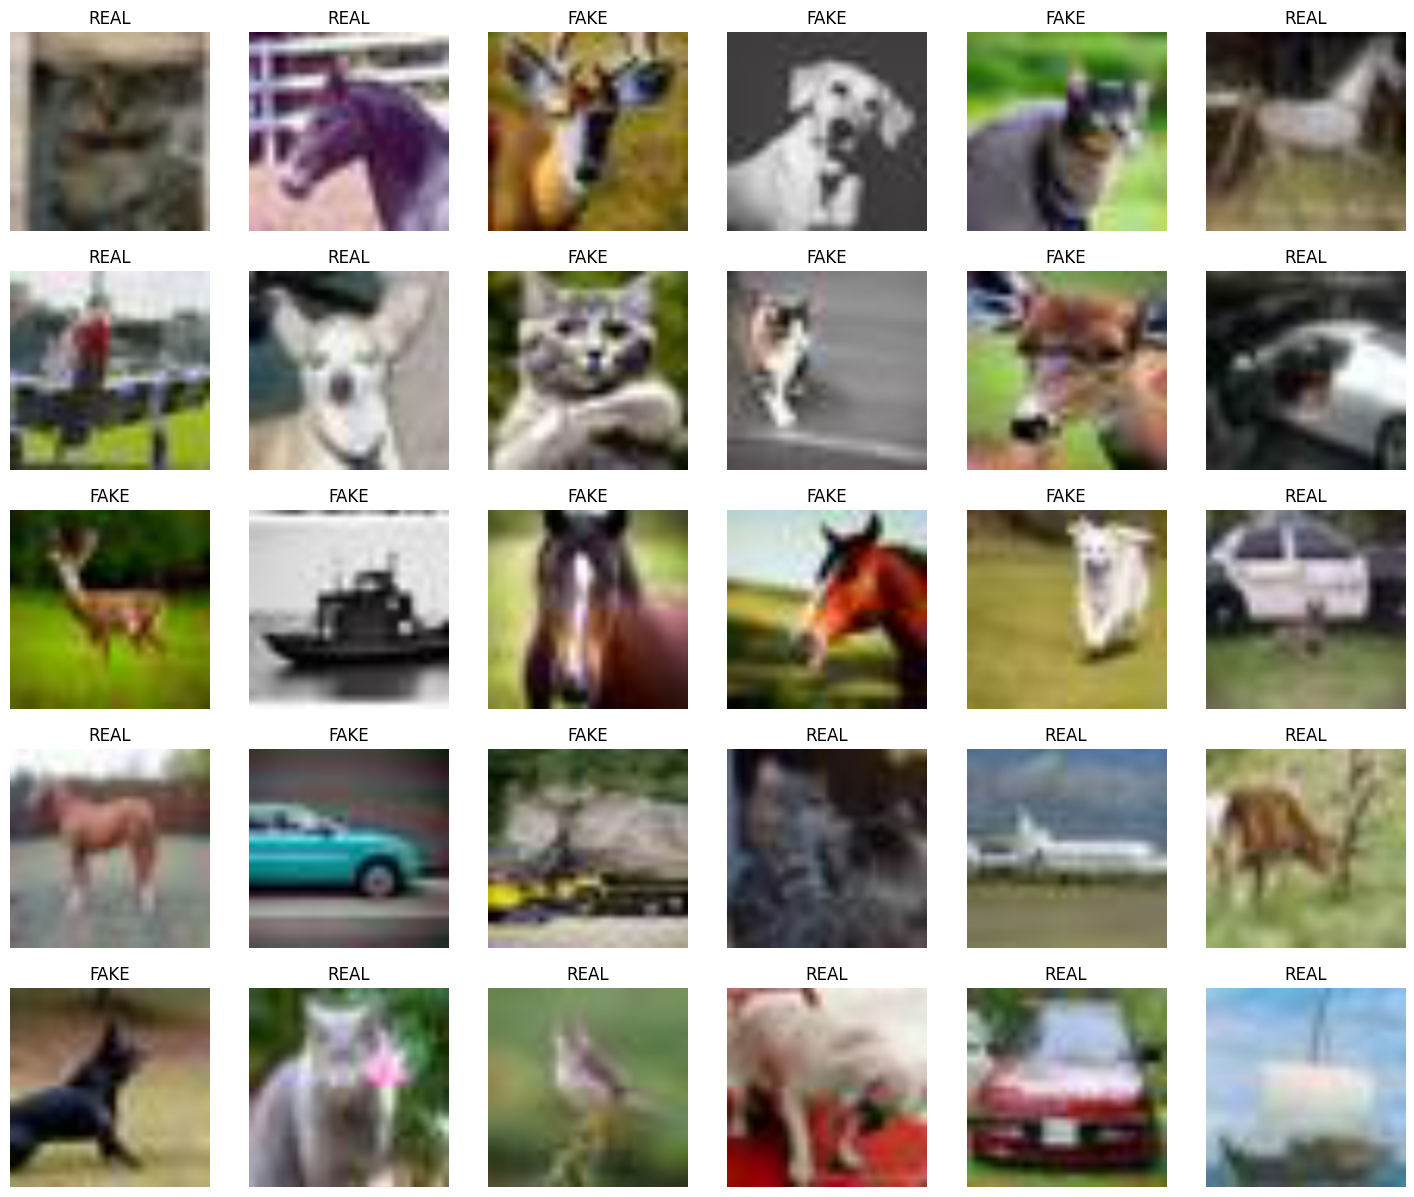

In [3]:
#from pathlib import Path
from fastai.vision.all import *
path = Path('train')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=30)


In [4]:
learn = vision_learner(dls, resnet50, metrics=error_rate)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 401MB/s]


In [5]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.189055,0.155086,0.059400,01:26


epoch,train_loss,valid_loss,error_rate,time
0,0.115320,0.092737,0.035800,01:39
1,0.069186,0.059250,0.022450,01:40
2,0.028105,0.048314,0.016850,01:40
3,0.005637,0.053203,0.016250,01:39


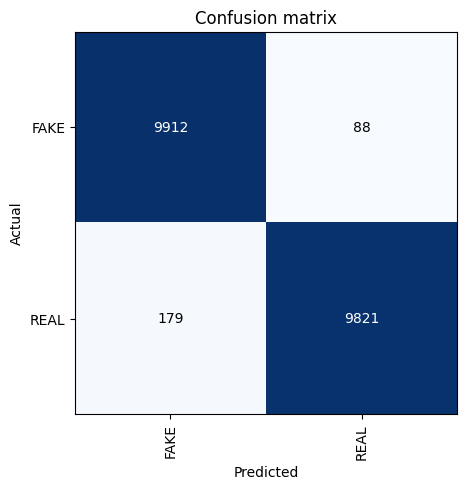

In [6]:
# Test dataset
files = get_files('test')

dl = learn.dls.test_dl(files, with_labels=True)

interp = ClassificationInterpretation.from_learner(learn, dl=dl)
interp.plot_confusion_matrix()

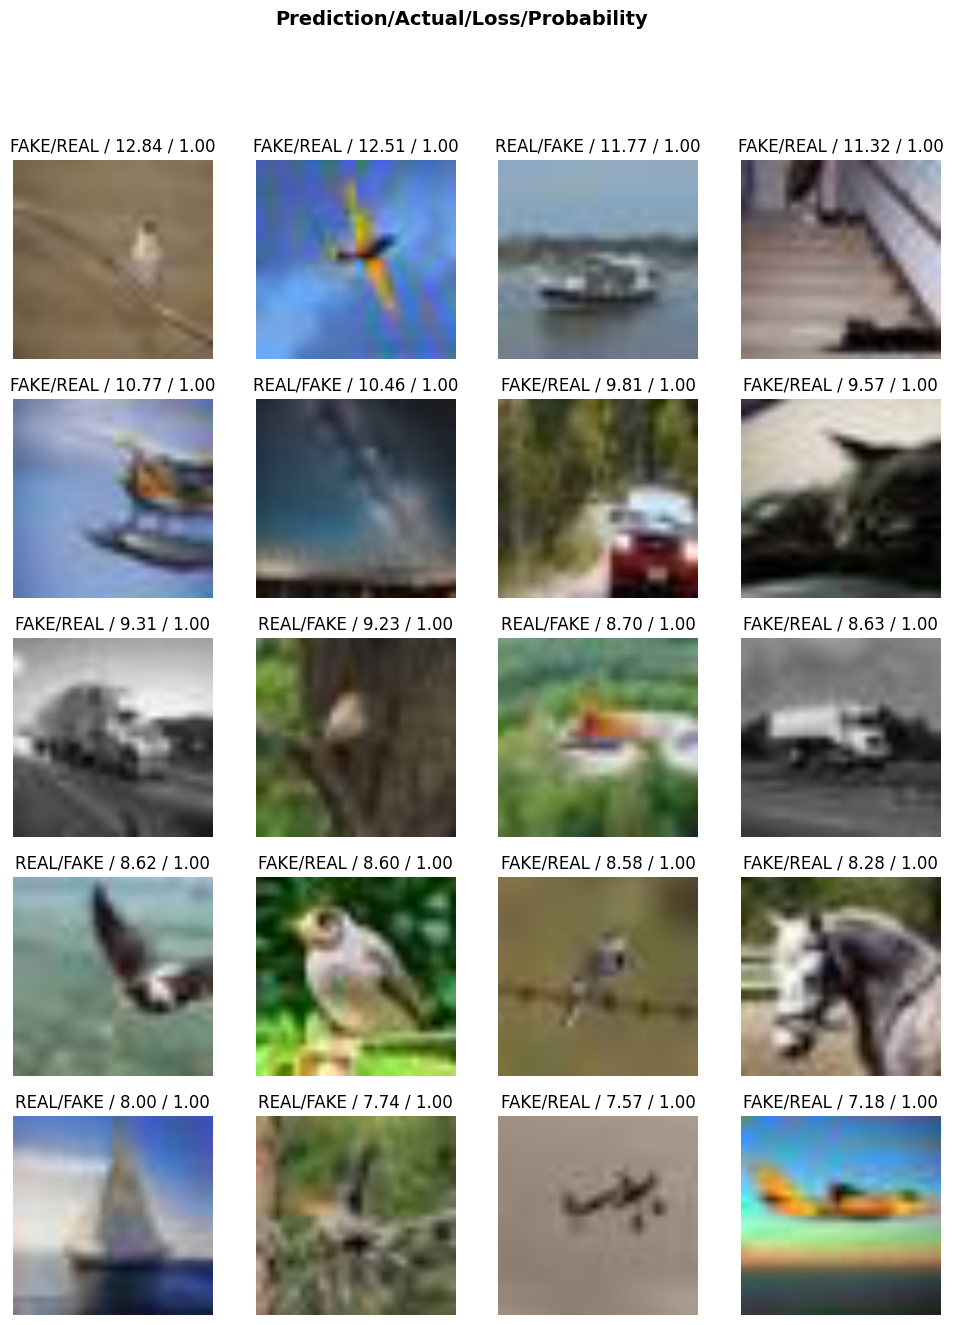

In [7]:
interp = ClassificationInterpretation.from_learner(learn, dl=dl)
interp.plot_top_losses(20, nrows=5)

In [8]:
from fastai.metrics import accuracy

preds, y, loss = learn.get_preds(learn, dl=dl, with_loss=True)
acc = accuracy(preds, y)
acc_value = acc.item() * 100  # Convert tensor to float and multiply by 100
print('The accuracy is {0:.2f} %.'.format(acc_value))

The accuracy is 98.66 %.
